#Análise exploratória de dados

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
base_credito = pd.read_csv('/content/train')

In [56]:
base_credito

,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-06-01 00:00:00+00:00,0,M,34.137,NaN,RO,-8.808779,-63.878470,D,E,...,2680.289259,D,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,181755
1,2017-08-18 00:00:00+00:00,0,M,40.447,NaN,PB,-7.146537,-34.926080,E,E,...,1777.725469,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,287633
2,2017-06-30 00:00:00+00:00,0,F,33.515,NaN,RS,-27.900178,-53.314035,NaN,E,...,1695.494979,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,88015
3,2017-08-05 00:00:00+00:00,1,F,25.797,NaN,BA,-12.948874,-38.451863,E,E,...,1399.037809,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,122576
4,2017-07-29 00:00:00+00:00,0,F,54.074,NaN,RS,-30.051810,-51.213277,B,E,...,7868.793296,C,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,1272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,2017-03-07 00:00:00+00:00,0,M,30.474,NaN,BA,-12.900183,-38.673056,E,E,...,1752.116912,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,163230
120746,2017-07-27 00:00:00+00:00,0,F,19.570,NaN,SP,-22.172110,-47.374184,E,E,...,1510.234174,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,315754
120747,2017-05-04 00:00:00+00:00,0,M,32.882,NaN,SP,-22.327290,-49.033763,NaN,E,...,1736.106081,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,156370
120748,2017-03-04 00:00:00+00:00,1,NaN,NaN,NaN,PA,-1.393497,-48.395074,NaN,E,...,1364.454508,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,232713


In [57]:
k = 0
for column in base_credito.columns:
  if base_credito[column].isnull().sum()/len(base_credito[column]) > 0.5:
    k += 1

porcentagem_de_colunas_nulas = k/len(base_credito.columns)
print(f"{porcentagem_de_colunas_nulas:.2f}")

# Colunas com mais de 50% dos dados nulos, não é bom utiliza-las para o treinamento do modelo

0.22


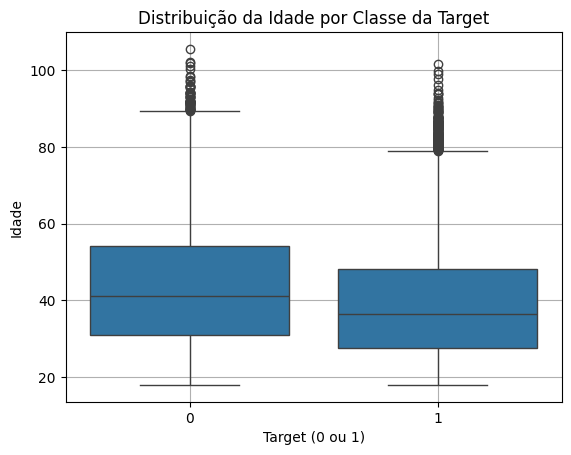

In [58]:
# É sabido que a inadimplência no ramo de crédito tem uma alta relação com a idade, vamos verificar se isso se faz presente nessa base

sns.boxplot(x='TARGET', y='IDADE', data=base_credito)

plt.title('Distribuição da Idade por Classe da Target')
plt.xlabel('Target (0 ou 1)')
plt.ylabel('Idade')
plt.grid(True)
plt.show()

Vemos que a média das idades da clase que representa a devedores é um pouco menor se comparado com aos bons pagantes, porém não é uma análise tão pois, provavelmente há um grande desbalanceamento nos dados

Também sabe-se que a divida tem certa relação com sua posição geográfica, vamos analisar isso para que em seguida seja feita uma análise mais ampla

In [59]:
from sklearn.feature_selection import chi2

X = pd.get_dummies(base_credito[['VAR5']], drop_first=True)
y = base_credito['TARGET']


# Aplicando o teste qui-quadrado
chi_scores, p_values = chi2(X, y)

resultados = pd.DataFrame({
    'Feature': X.columns,
    'Chi2': chi_scores,
    'p-valor': p_values
})
print(resultados.sort_values('p-valor'))


    Feature       Chi2       p-valor
0   VAR5_AL  40.549094  1.917374e-10
2   VAR5_AP  40.532656  1.933573e-10
9   VAR5_MG  29.193447  6.550038e-08
10  VAR5_MS  28.545886  9.150402e-08
16  VAR5_PR  27.968143  1.233291e-07
22  VAR5_SC  25.916743  3.564639e-07
18  VAR5_RN  24.748321  6.532569e-07
21  VAR5_RS  24.360442  7.989251e-07
14  VAR5_PE  24.026177  9.503484e-07
11  VAR5_MT  20.647542  5.520801e-06
19  VAR5_RO  16.706538  4.363037e-05
23  VAR5_SE  10.203202  1.401970e-03
12  VAR5_PA   9.953950  1.605047e-03
13  VAR5_PB   8.364783  3.825623e-03
1   VAR5_AM   7.605034  5.820558e-03
20  VAR5_RR   7.186294  7.346255e-03
24  VAR5_SP   6.643977  9.949158e-03
15  VAR5_PI   5.699438  1.697035e-02
6   VAR5_ES   4.227218  3.978059e-02
25  VAR5_TO   1.572198  2.098881e-01
17  VAR5_RJ   0.835346  3.607312e-01
7   VAR5_GO   0.354761  5.514301e-01
3   VAR5_BA   0.085303  7.702359e-01
5   VAR5_DF   0.080444  7.766960e-01
8   VAR5_MA   0.029843  8.628477e-01
4   VAR5_CE   0.004381  9.472273e-01


Isso é um dado extremamente interessante ! Quanto menor o p-value maior relação ele tem com a classe target !! Como podemos observar as variáveis AL, AP, MG e MS estão liderando, posteriormente pode ser feita uma análise do porquê esses estados em especifico possuem tal correlação.

De maneira mais genérica, vamos procurar dentre as variáveis categóricas as que possuem maior correlação com o TARGET

In [60]:
base_credito = base_credito.drop('REF_DATE', axis = 1)

In [61]:
categoricas = base_credito.select_dtypes(include=['object', 'category']).columns
resultados = []

for col in categoricas:
    dummies = pd.get_dummies(base_credito[col], prefix=col, drop_first=True)

    # Se dummies ficou vazio, pula para a próxima
    if dummies.empty:
        continue

    dados_validos = pd.concat([dummies, base_credito['TARGET']], axis=1).dropna()

    X = dados_validos[dummies.columns]
    y = dados_validos['TARGET']

    if X.empty or y.empty:
        continue

    try:
        chi_scores, p_values = chi2(X, y)
        for feature, chi, p in zip(X.columns, chi_scores, p_values):
            resultados.append({'Feature': feature, 'Chi2': chi, 'p-valor': p})
    except Exception as e:
        continue

resultados_df = pd.DataFrame(resultados).sort_values(by='p-valor')

melhores = resultados_df[resultados_df['p-valor'] < 0.05] # Foi usado esse 0.05 para selecionar os melhores resultados

print("\nMelhores variáveis categóricas associadas ao target:\n")
print(melhores)



Melhores variáveis categóricas associadas ao target:

                  Feature        Chi2       p-valor
363              VAR142_D  234.889760  5.116996e-53
274    VAR118_MUITO LONGE  203.317909  3.942928e-46
258    VAR114_MUITO LONGE  194.522682  3.274814e-44
350    VAR138_MUITO LONGE  163.833976  1.644488e-37
318    VAR130_MUITO LONGE  163.358530  2.088796e-37
..                    ...         ...           ...
71             VAR34_PSDB    4.230508  3.970355e-02
7                 VAR5_ES    4.227218  3.978059e-02
239  VAR109_MUITO PROXIMO    4.145967  4.173382e-02
95                VAR59_S    4.018906  4.499289e-02
131           VAR75_MEDIA    3.979807  4.604884e-02

[282 rows x 3 columns]


Vamos visualizar graficamente os melhores da lista

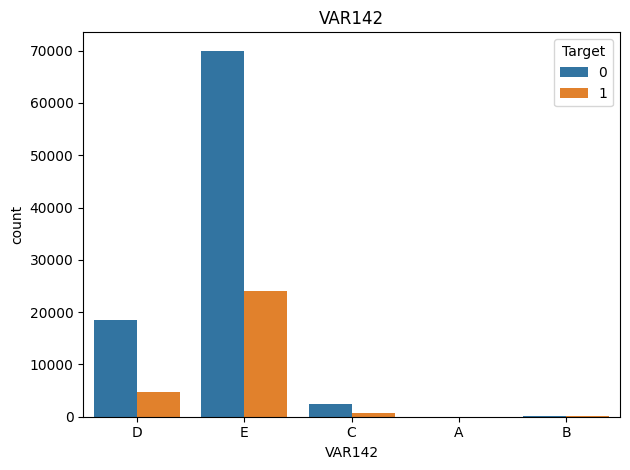

In [62]:
sns.countplot(x='VAR142', hue='TARGET', data=base_credito)
plt.title('VAR142')
plt.legend(title='Target')
plt.tight_layout()
plt.show()


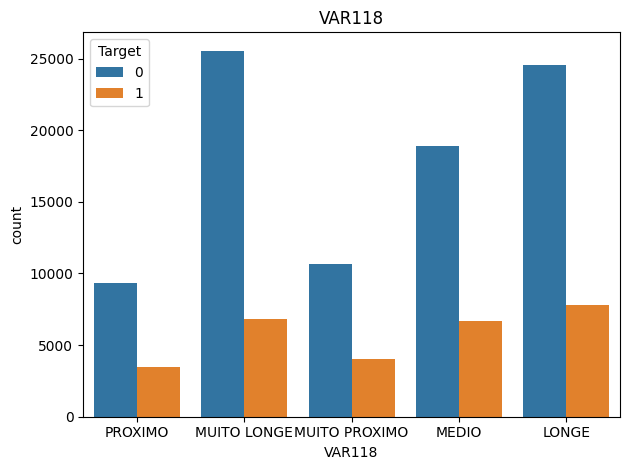

In [63]:
sns.countplot(x='VAR118', hue='TARGET', data=base_credito)
plt.title('VAR118')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

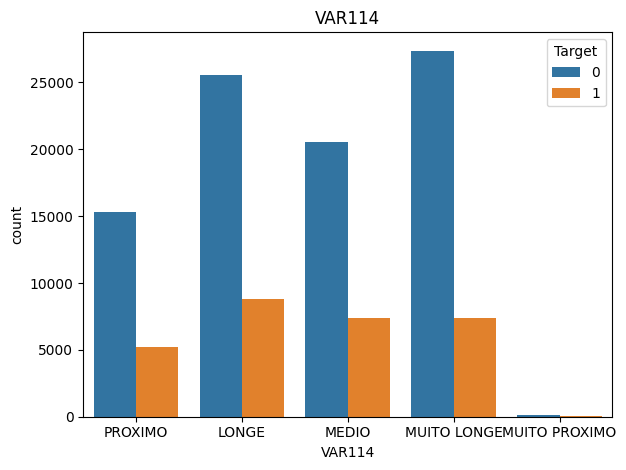

In [64]:
sns.countplot(x='VAR114', hue='TARGET', data=base_credito)
plt.title('VAR114')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

Note que esse recurso gráfico mostra com muito clareza a relação entre os targets e as features. Alguns não são tão relevantes como o VAR114, em contrapartida no VAR142 o estado 'E' possui alta ligação com o target

Agora a análise das variaveis numéricas.

In [65]:
import pandas as pd
from scipy.stats import pearsonr

# Selecionar variáveis numéricas (excluindo a TARGET)
numericas = base_credito.select_dtypes(include=['int64', 'float64']).columns
resultados = []

for col in numericas:
    if col == 'TARGET':
        continue

    dados_validos = base_credito[[col, 'TARGET']].dropna()

    if dados_validos.empty:
        continue

    try:
        # Calcular correlação de Pearson e p-valor
        corr, p_valor = pearsonr(dados_validos[col], dados_validos['TARGET'])

        resultados.append({
            'Feature': col,
            'Correlação (Pearson)': corr,
            'p-valor': p_valor,
            'Correlacao Absoluta': abs(corr)
        })

    except Exception as e:
        continue  # pula variáveis que não puderem ser processadas

# DataFrame de resultados ordenado pela correlação absoluta
resultados_df = pd.DataFrame(resultados).sort_values(by='Correlacao Absoluta', ascending=False)

# Filtrar os melhores (ex: p-valor < 0.05)
melhores = resultados_df[resultados_df['p-valor'] < 0.05]

# Exibir resultados
print("\nVariáveis numéricas com maior correlação com o TARGET e p < 0.05:\n")
print(melhores[['Feature', 'Correlação (Pearson)', 'p-valor']])



Variáveis numéricas com maior correlação com o TARGET e p < 0.05:

   Feature  Correlação (Pearson)        p-valor
29   VAR46              0.386818   6.254973e-12
6    VAR14              0.210133   0.000000e+00
0    IDADE             -0.112180  9.577329e-297
4    VAR12              0.087720  2.041448e-112
24   VAR39             -0.078515  2.651617e-164
9    VAR17             -0.069706   3.420619e-18
26   VAR41             -0.050060   2.990305e-66
23   VAR37              0.040954   8.958948e-11
10   VAR18             -0.040894   1.587290e-36
11   VAR19             -0.040564   1.175897e-22
17   VAR25              0.038194   2.896364e-20
7    VAR15             -0.037530   1.275972e-19
25   VAR40             -0.037338   1.611017e-37
20   VAR28             -0.036408   4.007790e-05
2     VAR7              0.030157   4.900182e-25
5    VAR13             -0.030081   1.773784e-04
8    VAR16             -0.028801   9.992650e-10
1     VAR6              0.028756   6.560777e-23
16   VAR24          

Pode ser observado um fenomeno muito interessante nessa tabela. A VAR14 possui um p-value 0, porém tem um coeficiente de pearson menor que a VAR46. Isso dá ao fato da VAR14 possui um cofiança na correlação maior que VAR46, mesmo que a correlação seja mais 'fraca'.

Outro fato importante de ser comentado também é a correlação negativa da idade, o que denota algo que já se tinha comentado antes no boxplot, que pessoas mais jovens tendem a ficar mais inadimplentes.

# Pré processamento

Agora vamos lidar com o tratamento dos dados, é notório que nossa base possui muito dados nulos, então colunas com 30% de dados nulos serão descartadas.

In [66]:
base_credito

,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,0,M,34.137,NaN,RO,-8.808779,-63.878470,D,E,BAIXA,...,2680.289259,D,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,181755
1,0,M,40.447,NaN,PB,-7.146537,-34.926080,E,E,MEDIA,...,1777.725469,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,287633
2,0,F,33.515,NaN,RS,-27.900178,-53.314035,NaN,E,ALTISSIMA,...,1695.494979,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,88015
3,1,F,25.797,NaN,BA,-12.948874,-38.451863,E,E,MEDIA,...,1399.037809,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,122576
4,0,F,54.074,NaN,RS,-30.051810,-51.213277,B,E,MEDIA,...,7868.793296,C,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,1272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,0,M,30.474,NaN,BA,-12.900183,-38.673056,E,E,ALTISSIMA,...,1752.116912,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,163230
120746,0,F,19.570,NaN,SP,-22.172110,-47.374184,E,E,MEDIA,...,1510.234174,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,315754
120747,0,M,32.882,NaN,SP,-22.327290,-49.033763,NaN,E,MEDIA,...,1736.106081,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,156370
120748,1,NaN,NaN,NaN,PA,-1.393497,-48.395074,NaN,E,MEDIA,...,1364.454508,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,232713


In [67]:
lista_colunas_nulas = []
for column in base_credito.columns:
  if base_credito[column].isnull().sum()/len(base_credito[column]) > 0.3:
    lista_colunas_nulas.append(column)
    base_credito = base_credito.drop(column, axis = 1)

In [68]:
base_credito

,TARGET,VAR2,IDADE,VAR5,VAR6,VAR7,VAR9,VAR10,VAR14,VAR18,...,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR147,VAR148,VAR149,ID
0,0,M,34.137,RO,-8.808779,-63.878470,E,BAIXA,0.141,1.263014,...,LONGE,LONGE,MEDIO,LONGE,2680.289259,D,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,181755
1,0,M,40.447,PB,-7.146537,-34.926080,E,MEDIA,0.136,0.654795,...,LONGE,LONGE,LONGE,MUITO LONGE,1777.725469,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,287633
2,0,F,33.515,RS,-27.900178,-53.314035,E,ALTISSIMA,0.152,1.665753,...,LONGE,MUITO LONGE,LONGE,MUITO PROXIMO,1695.494979,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,88015
3,1,F,25.797,BA,-12.948874,-38.451863,E,MEDIA,0.014,0.619178,...,MEDIO,LONGE,MEDIO,MEDIO,1399.037809,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,122576
4,0,F,54.074,RS,-30.051810,-51.213277,E,MEDIA,0.207,2.090411,...,PROXIMO,MUITO PROXIMO,PROXIMO,MUITO PROXIMO,7868.793296,C,102,EMAIL INEXISTENTE,2.6.1,1272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,0,M,30.474,BA,-12.900183,-38.673056,E,ALTISSIMA,0.777,1.027397,...,LONGE,LONGE,MUITO LONGE,MUITO LONGE,1752.116912,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,163230
120746,0,F,19.570,SP,-22.172110,-47.374184,E,MEDIA,0.119,1.416438,...,MEDIO,MEDIO,MEDIO,LONGE,1510.234174,E,102,EMAIL INEXISTENTE,2.6.1,315754
120747,0,M,32.882,SP,-22.327290,-49.033763,E,MEDIA,0.131,0.364384,...,MEDIO,PROXIMO,MEDIO,LONGE,1736.106081,E,102,EMAIL INEXISTENTE,2.6.1,156370
120748,1,NaN,NaN,PA,-1.393497,-48.395074,E,MEDIA,NaN,NaN,...,LONGE,MEDIO,LONGE,LONGE,1364.454508,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,232713


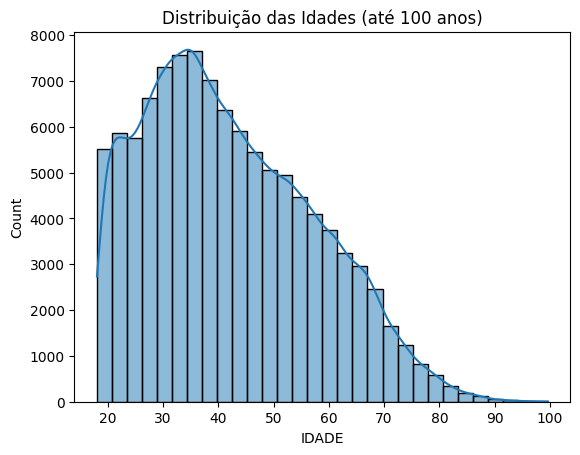

In [69]:
filtro_idade = base_credito[base_credito['IDADE'] <= 100]

sns.histplot(filtro_idade['IDADE'], bins=30, kde=True)
plt.title('Distribuição das Idades (até 100 anos)')
plt.show()

Os dados nulos remanascentes não serão preenchidos com o intuito de manter o mais proximo possivel da realidade, caso por exemplo houvesse a substituição de dados nulos da idade pela mediana, esse gráfico seria totalmente diferente do que agora, mudando assim totalmente a realidade.

Será usado Feature Engineering nas features com maior correlação para observar se alguma boa relação.

Fui tentar fazer com a VAR46 e ela não estava mais no dataset, ou seja possuia muito de seus dados nulos

In [70]:
base_credito['IDADE*VAR14'] = base_credito['IDADE'] * base_credito['VAR14']
base_credito['IDADE/VAR14'] = base_credito['IDADE'] / base_credito['VAR14']

In [71]:
base_credito

,TARGET,VAR2,IDADE,VAR5,VAR6,VAR7,VAR9,VAR10,VAR14,VAR18,...,VAR139,VAR140,VAR141,VAR142,VAR147,VAR148,VAR149,ID,IDADE*VAR14,IDADE/VAR14
0,0,M,34.137,RO,-8.808779,-63.878470,E,BAIXA,0.141,1.263014,...,MEDIO,LONGE,2680.289259,D,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,181755,4.813317,242.106383
1,0,M,40.447,PB,-7.146537,-34.926080,E,MEDIA,0.136,0.654795,...,LONGE,MUITO LONGE,1777.725469,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,287633,5.500792,297.404412
2,0,F,33.515,RS,-27.900178,-53.314035,E,ALTISSIMA,0.152,1.665753,...,LONGE,MUITO PROXIMO,1695.494979,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,88015,5.094280,220.493421
3,1,F,25.797,BA,-12.948874,-38.451863,E,MEDIA,0.014,0.619178,...,MEDIO,MEDIO,1399.037809,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,122576,0.361158,1842.642857
4,0,F,54.074,RS,-30.051810,-51.213277,E,MEDIA,0.207,2.090411,...,PROXIMO,MUITO PROXIMO,7868.793296,C,102,EMAIL INEXISTENTE,2.6.1,1272,11.193318,261.227053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,0,M,30.474,BA,-12.900183,-38.673056,E,ALTISSIMA,0.777,1.027397,...,MUITO LONGE,MUITO LONGE,1752.116912,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,163230,23.678298,39.220077
120746,0,F,19.570,SP,-22.172110,-47.374184,E,MEDIA,0.119,1.416438,...,MEDIO,LONGE,1510.234174,E,102,EMAIL INEXISTENTE,2.6.1,315754,2.328830,164.453782
120747,0,M,32.882,SP,-22.327290,-49.033763,E,MEDIA,0.131,0.364384,...,MEDIO,LONGE,1736.106081,E,102,EMAIL INEXISTENTE,2.6.1,156370,4.307542,251.007634
120748,1,NaN,NaN,PA,-1.393497,-48.395074,E,MEDIA,NaN,NaN,...,LONGE,LONGE,1364.454508,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,232713,NaN,NaN


In [72]:
dados_validos_mul = base_credito[['IDADE*VAR14', 'TARGET']].dropna()
dados_validos_div = base_credito[['IDADE/VAR14', 'TARGET']].dropna()

In [73]:
dados_validos_mul

,IDADE*VAR14,TARGET
0,4.813317,0
1,5.500792,0
2,5.094280,0
3,0.361158,1
4,11.193318,0
...,...,...
120741,45.855562,1
120744,8.380800,0
120745,23.678298,0
120746,2.328830,0


In [74]:
correlacao, p_valor = pearsonr(dados_validos_mul['IDADE*VAR14'], dados_validos_mul['TARGET'])

print(f"Correlação de Pearson: {correlacao:.4f}")
print(f"p-valor: {p_valor:.4f}")

Correlação de Pearson: 0.1819
p-valor: 0.0000


Não houve ganho significativo

In [75]:
correlacao, p_valor = pearsonr(dados_validos_div['IDADE/VAR14'], dados_validos_div['TARGET'])

print(f"Correlação de Pearson: {correlacao:.4f}")
print(f"p-valor: {p_valor:.4f}")

Correlação de Pearson: nan
p-valor: nan


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4750: RuntimeWarning: invalid value encountered in subtract
  xm = x - xmean


Não houve ganho algum

In [76]:
base_credito = base_credito.drop('IDADE/VAR14',axis = 1)

A partir de agora iremos transformar as variaveis categóricas em números

In [77]:
base_credito = base_credito.drop('VAR148', axis = 1)
base_credito = base_credito.drop('VAR149', axis = 1)

In [78]:
colunas_base_credito = base_credito.columns
print(colunas_base_credito)

Index(['TARGET', 'VAR2', 'IDADE', 'VAR5', 'VAR6', 'VAR7', 'VAR9', 'VAR10',
       'VAR14', 'VAR18',
       ...
       'VAR136', 'VAR137', 'VAR138', 'VAR139', 'VAR140', 'VAR141', 'VAR142',
       'VAR147', 'ID', 'IDADE*VAR14'],
      dtype='object', length=113)


Devemos separar as variavéis categoricas em ordinais e não ordinais para trata-las da melhor forma

In [79]:
categoricas = base_credito.select_dtypes(include=['object', 'category']).columns
print(categoricas)

Index(['VAR2', 'VAR5', 'VAR9', 'VAR10', 'VAR49', 'VAR50', 'VAR51', 'VAR52',
       'VAR53', 'VAR54', 'VAR55', 'VAR56', 'VAR57', 'VAR58', 'VAR59', 'VAR60',
       'VAR61', 'VAR62', 'VAR63', 'VAR64', 'VAR65', 'VAR66', 'VAR67', 'VAR68',
       'VAR69', 'VAR70', 'VAR71', 'VAR72', 'VAR73', 'VAR74', 'VAR75', 'VAR76',
       'VAR77', 'VAR78', 'VAR79', 'VAR80', 'VAR81', 'VAR82', 'VAR83', 'VAR84',
       'VAR85', 'VAR86', 'VAR87', 'VAR88', 'VAR89', 'VAR90', 'VAR91', 'VAR92',
       'VAR93', 'VAR94', 'VAR95', 'VAR96', 'VAR97', 'VAR98', 'VAR99', 'VAR100',
       'VAR101', 'VAR102', 'VAR103', 'VAR104', 'VAR105', 'VAR106', 'VAR107',
       'VAR108', 'VAR109', 'VAR110', 'VAR111', 'VAR112', 'VAR113', 'VAR114',
       'VAR115', 'VAR116', 'VAR117', 'VAR118', 'VAR119', 'VAR120', 'VAR121',
       'VAR122', 'VAR123', 'VAR124', 'VAR125', 'VAR126', 'VAR127', 'VAR128',
       'VAR129', 'VAR130', 'VAR131', 'VAR132', 'VAR133', 'VAR134', 'VAR135',
       'VAR136', 'VAR137', 'VAR138', 'VAR139', 'VAR140', 'VAR142

Notei que todas as colunas que possuem carater ordinal têm em suas variaveis 'MEDIA' ou 'MEDIO', então um filtro será feito com base nisso

In [80]:
categoricas = base_credito.select_dtypes(include=['object', 'category']).columns

ordinais = []

for col in categoricas:
    if base_credito[col].astype(str).str.upper().str.contains('MEDIA|MEDIO').any():
        ordinais.append(col)

print("Colunas categóricas ordinais identificadas:")
print(ordinais)


Colunas categóricas ordinais identificadas:
['VAR10', 'VAR66', 'VAR68', 'VAR69', 'VAR70', 'VAR71', 'VAR72', 'VAR73', 'VAR74', 'VAR75', 'VAR76', 'VAR77', 'VAR78', 'VAR79', 'VAR80', 'VAR81', 'VAR83', 'VAR84', 'VAR85', 'VAR86', 'VAR87', 'VAR88', 'VAR89', 'VAR91', 'VAR92', 'VAR94', 'VAR96', 'VAR97', 'VAR98', 'VAR99', 'VAR101', 'VAR102', 'VAR103', 'VAR104', 'VAR105', 'VAR106', 'VAR107', 'VAR108', 'VAR109', 'VAR110', 'VAR111', 'VAR112', 'VAR113', 'VAR114', 'VAR115', 'VAR116', 'VAR117', 'VAR118', 'VAR119', 'VAR121', 'VAR122', 'VAR123', 'VAR124', 'VAR125', 'VAR126', 'VAR127', 'VAR128', 'VAR129', 'VAR130', 'VAR131', 'VAR132', 'VAR133', 'VAR134', 'VAR135', 'VAR136', 'VAR137', 'VAR138', 'VAR139', 'VAR140']


In [81]:
print(len(ordinais))
print(len(categoricas))

69
97


In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ordinais:
  base_credito[col] = le.fit_transform(base_credito[col])

In [83]:
base_credito

,TARGET,VAR2,IDADE,VAR5,VAR6,VAR7,VAR9,VAR10,VAR14,VAR18,...,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR147,ID,IDADE*VAR14
0,0,M,34.137,RO,-8.808779,-63.878470,E,2,0.141,1.263014,...,2,0,0,1,0,2680.289259,D,102,181755,4.813317
1,0,M,40.447,PB,-7.146537,-34.926080,E,4,0.136,0.654795,...,4,0,0,0,2,1777.725469,E,102,287633,5.500792
2,0,F,33.515,RS,-27.900178,-53.314035,E,1,0.152,1.665753,...,0,0,2,0,3,1695.494979,E,102,88015,5.094280
3,1,F,25.797,BA,-12.948874,-38.451863,E,4,0.014,0.619178,...,4,1,0,1,1,1399.037809,E,102,122576,0.361158
4,0,F,54.074,RS,-30.051810,-51.213277,E,4,0.207,2.090411,...,1,4,3,4,3,7868.793296,C,102,1272,11.193318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,0,M,30.474,BA,-12.900183,-38.673056,E,1,0.777,1.027397,...,1,0,0,2,2,1752.116912,E,102,163230,23.678298
120746,0,F,19.570,SP,-22.172110,-47.374184,E,4,0.119,1.416438,...,0,1,1,1,0,1510.234174,E,102,315754,2.328830
120747,0,M,32.882,SP,-22.327290,-49.033763,E,4,0.131,0.364384,...,1,1,4,1,0,1736.106081,E,102,156370,4.307542
120748,1,NaN,NaN,PA,-1.393497,-48.395074,E,4,NaN,NaN,...,2,0,1,0,0,1364.454508,E,102,232713,NaN


In [84]:
categoricas = base_credito.select_dtypes(include=['object', 'category']).columns
print(len(categoricas))

28


In [85]:
for col in categoricas:
  base_credito = pd.get_dummies(base_credito, columns=[col], drop_first=True)

In [86]:
base_credito

,TARGET,IDADE,VAR6,VAR7,VAR10,VAR14,VAR18,VAR24,VAR39,VAR40,...,VAR93_ALTISSIMA,VAR93_BAIXISSIMA,VAR95_ALTISSIMA,VAR95_BAIXISSIMA,VAR100_BAIXISSIMA,VAR120_PROXIMO,VAR142_B,VAR142_C,VAR142_D,VAR142_E
0,0,34.137,-8.808779,-63.878470,2,0.141,1.263014,0.034,0.512334,0.486768,...,False,True,False,True,True,True,False,False,True,False
1,0,40.447,-7.146537,-34.926080,4,0.136,0.654795,0.017,0.328021,0.447454,...,False,False,False,False,False,False,False,False,False,True
2,0,33.515,-27.900178,-53.314035,1,0.152,1.665753,0.000,0.627262,0.730539,...,False,True,False,True,True,True,False,False,False,True
3,1,25.797,-12.948874,-38.451863,4,0.014,0.619178,0.000,0.338643,0.405233,...,True,False,False,False,False,False,False,False,False,True
4,0,54.074,-30.051810,-51.213277,4,0.207,2.090411,0.000,0.626047,0.770664,...,True,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,0,30.474,-12.900183,-38.673056,1,0.777,1.027397,0.034,0.292768,0.509101,...,False,True,False,True,True,False,False,False,False,True
120746,0,19.570,-22.172110,-47.374184,4,0.119,1.416438,0.000,0.626240,0.423891,...,False,True,False,False,True,False,False,False,False,True
120747,0,32.882,-22.327290,-49.033763,4,0.131,0.364384,0.103,0.337504,0.484162,...,True,False,True,False,True,False,False,False,False,True
120748,1,NaN,-1.393497,-48.395074,4,NaN,NaN,NaN,0.150710,0.394288,...,True,False,False,False,True,False,False,False,False,True


#Treinamento do modelo

/tmp/ipython-input-87-3403966860.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Target')


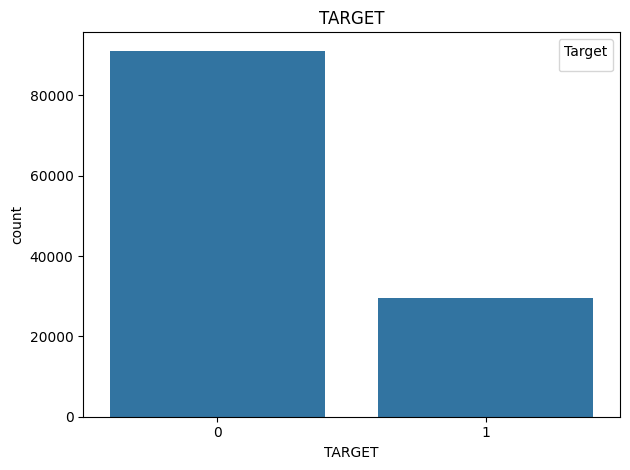

In [87]:
sns.countplot(x='TARGET', data=base_credito)
plt.title('TARGET')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

In [88]:
k = 0
for i in range(len(base_credito['TARGET'])):
  if base_credito['TARGET'][i] == 1:
    k += 1
porcentagem_maus_pagadores = k/len(base_credito['TARGET'])
print(f"{porcentagem_maus_pagadores:.2f}")

0.25


É notório o desbalancemanto da classe target, se treinarmos o modelo com a classe dessa forma o modelo ficaria 'viciado' em classificar os resultados como 0, por isso a abordagem escolhida por mim será usar o ROS com o RENN, para replicar os dados da classe minoritária de forma que tenha a menor chance de causar overfitting

In [89]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
def validacao_cruzada(modelo, X, y, oversampling=False):
    kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    acuracias_split = []

    for idx, (idx_treino, idx_validacao) in enumerate(kf.split(X, y)):
        X_split_treino = X.iloc[idx_treino, :]
        y_split_treino = y.iloc[idx_treino]

        if oversampling:
            ros = RandomOverSampler(random_state=42)
            renn = EditedNearestNeighbours()
            pipeline = Pipeline([('ros', ros), ('renn', renn)])
            X_split_treino, y_split_treino = pipeline.fit_resample(X_split_treino, y_split_treino)

        modelo.fit(X_split_treino, y_split_treino.values.flatten())

        x_split_validacao = X.iloc[idx_validacao, :]
        y_split_validacao = y.iloc[idx_validacao]

        y_proba = modelo.predict_proba(x_split_validacao)[:, 1]  # Probabilidade da classe 1
        threshold = 0.6 # Dando um carater mais conservativo para o modelo
        predicao_split_validacao = (y_proba > threshold).astype(int)
        acuracia_split = accuracy_score(y_split_validacao, predicao_split_validacao)
        acuracias_split.append(acuracia_split)

        print(f'Acurácia do split {idx}: {acuracia_split:.4f}')
        print(classification_report(y_split_validacao, predicao_split_validacao, digits=4))

        cm = confusion_matrix(y_split_validacao, predicao_split_validacao)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Classe 0', 'Classe 1'],
                    yticklabels=['Classe 0', 'Classe 1'])
        plt.xlabel('Previsto')
        plt.ylabel('Real')
        plt.title(f'Matriz de Confusão - Split {idx}')
        plt.show()

    return acuracias_split


In [91]:
import xgboost as xgb
from xgboost import XGBClassifier


model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    min_child_weight=5,
    reg_alpha=0.5,
    reg_lambda=1.0,
    tree_method='hist',
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=1
)

In [92]:
base_credito = base_credito.dropna()

In [93]:
base_credito_salva = base_credito

In [94]:
base_credito

,TARGET,IDADE,VAR6,VAR7,VAR10,VAR14,VAR18,VAR24,VAR39,VAR40,...,VAR93_ALTISSIMA,VAR93_BAIXISSIMA,VAR95_ALTISSIMA,VAR95_BAIXISSIMA,VAR100_BAIXISSIMA,VAR120_PROXIMO,VAR142_B,VAR142_C,VAR142_D,VAR142_E
0,0,34.137,-8.808779,-63.878470,2,0.141,1.263014,0.034,0.512334,0.486768,...,False,True,False,True,True,True,False,False,True,False
1,0,40.447,-7.146537,-34.926080,4,0.136,0.654795,0.017,0.328021,0.447454,...,False,False,False,False,False,False,False,False,False,True
2,0,33.515,-27.900178,-53.314035,1,0.152,1.665753,0.000,0.627262,0.730539,...,False,True,False,True,True,True,False,False,False,True
3,1,25.797,-12.948874,-38.451863,4,0.014,0.619178,0.000,0.338643,0.405233,...,True,False,False,False,False,False,False,False,False,True
4,0,54.074,-30.051810,-51.213277,4,0.207,2.090411,0.000,0.626047,0.770664,...,True,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120741,1,56.542,-22.908912,-43.529742,2,0.811,1.358904,0.000,0.659230,0.360866,...,True,False,False,False,False,False,False,False,False,True
120744,0,58.200,-16.374239,-39.584417,4,0.144,0.463014,0.052,0.404892,0.601403,...,False,True,False,False,True,False,False,False,False,True
120745,0,30.474,-12.900183,-38.673056,1,0.777,1.027397,0.034,0.292768,0.509101,...,False,True,False,True,True,False,False,False,False,True
120746,0,19.570,-22.172110,-47.374184,4,0.119,1.416438,0.000,0.626240,0.423891,...,False,True,False,False,True,False,False,False,False,True


Foi removida as linhas nulas porque o ROS não aceita dados nulos, e isso é um problema, pois foi perdido 30000 linhas de dados

In [95]:
base_credito_target = base_credito['TARGET']
base_credito = base_credito.drop('TARGET', axis = 1)

In [96]:
from statistics import mean

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:01:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia do split 0: 0.7686
              precision    recall  f1-score   support

           0     0.8095    0.9179    0.8603      6970
           1     0.4689    0.2511    0.3271      2011

    accuracy                         0.7686      8981
   macro avg     0.6392    0.5845    0.5937      8981
weighted avg     0.7332    0.7686    0.7409      8981



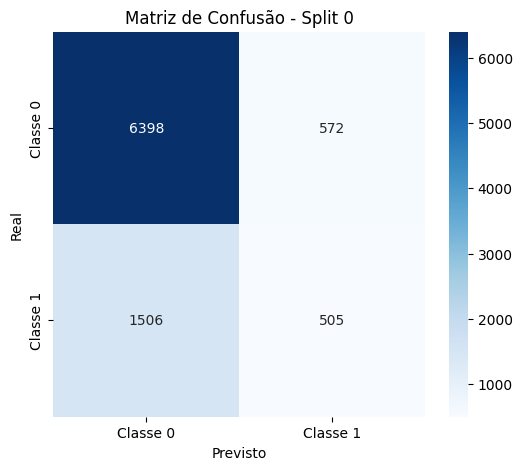

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:04:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia do split 1: 0.7751
              precision    recall  f1-score   support

           0     0.8136    0.9212    0.8641      6969
           1     0.4963    0.2689    0.3488      2012

    accuracy                         0.7751      8981
   macro avg     0.6550    0.5951    0.6064      8981
weighted avg     0.7425    0.7751    0.7486      8981



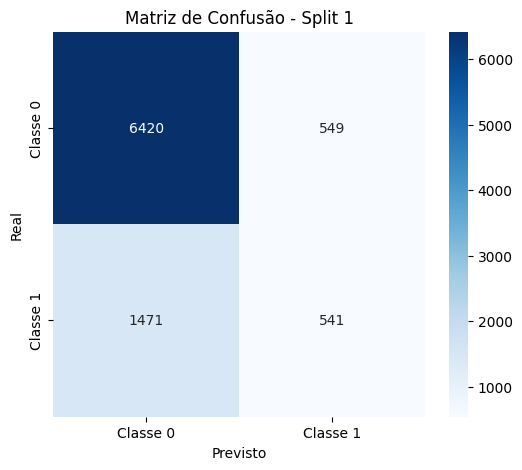

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:06:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia do split 2: 0.7707
              precision    recall  f1-score   support

           0     0.8114    0.9179    0.8614      6969
           1     0.4781    0.2606    0.3373      2011

    accuracy                         0.7707      8980
   macro avg     0.6447    0.5892    0.5993      8980
weighted avg     0.7368    0.7707    0.7440      8980



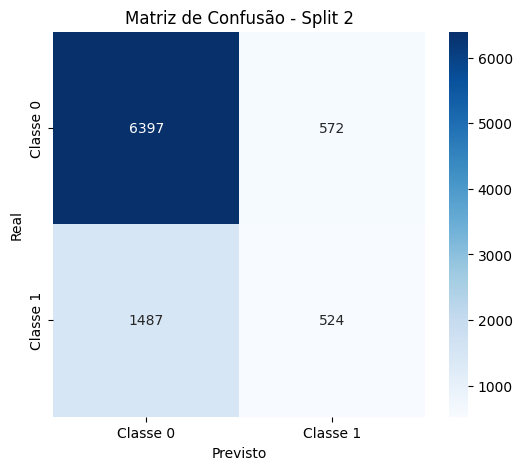

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:09:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia do split 3: 0.7704
              precision    recall  f1-score   support

           0     0.8094    0.9209    0.8616      6969
           1     0.4757    0.2486    0.3266      2011

    accuracy                         0.7704      8980
   macro avg     0.6426    0.5848    0.5941      8980
weighted avg     0.7347    0.7704    0.7418      8980



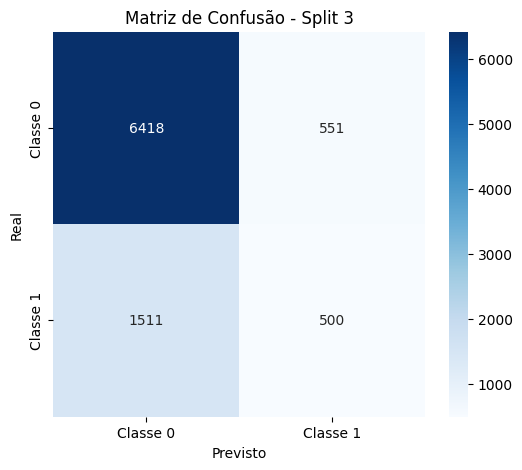

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:11:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia do split 4: 0.7771
              precision    recall  f1-score   support

           0     0.8139    0.9241    0.8655      6969
           1     0.5042    0.2675    0.3496      2011

    accuracy                         0.7771      8980
   macro avg     0.6590    0.5958    0.6075      8980
weighted avg     0.7445    0.7771    0.7499      8980



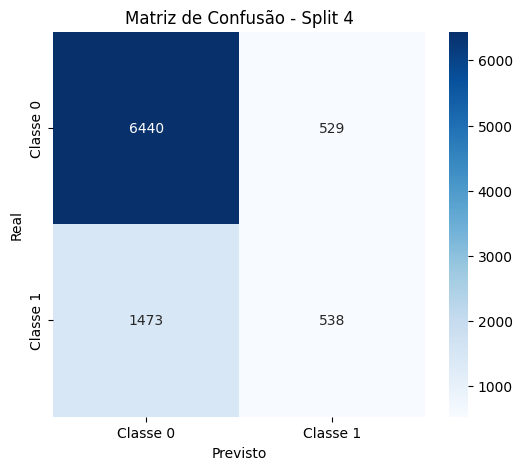

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:14:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia do split 5: 0.7693
              precision    recall  f1-score   support

           0     0.8086    0.9206    0.8610      6969
           1     0.4708    0.2447    0.3220      2011

    accuracy                         0.7693      8980
   macro avg     0.6397    0.5827    0.5915      8980
weighted avg     0.7329    0.7693    0.7403      8980



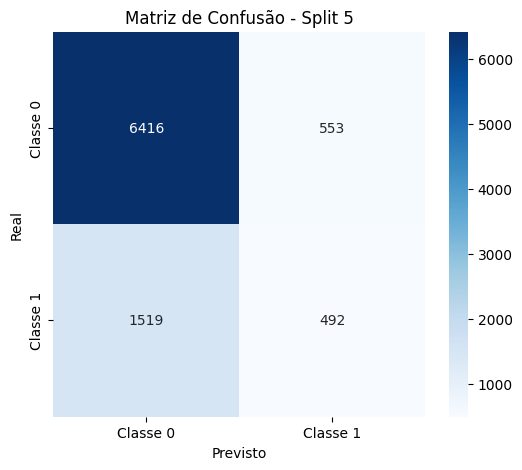

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:16:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia do split 6: 0.7717
              precision    recall  f1-score   support

           0     0.8120    0.9185    0.8620      6969
           1     0.4822    0.2631    0.3404      2011

    accuracy                         0.7717      8980
   macro avg     0.6471    0.5908    0.6012      8980
weighted avg     0.7381    0.7717    0.7452      8980



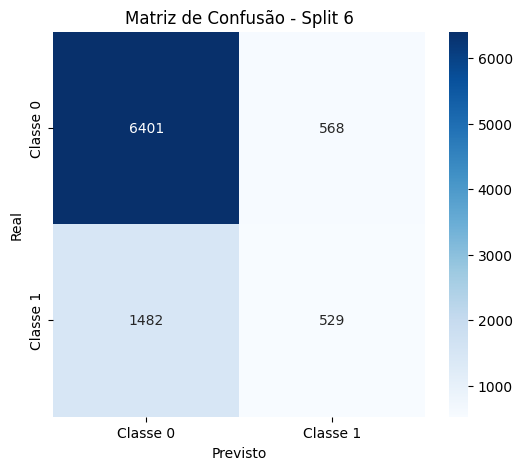

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:19:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia do split 7: 0.7694
              precision    recall  f1-score   support

           0     0.8106    0.9171    0.8606      6969
           1     0.4726    0.2576    0.3334      2011

    accuracy                         0.7694      8980
   macro avg     0.6416    0.5873    0.5970      8980
weighted avg     0.7349    0.7694    0.7425      8980



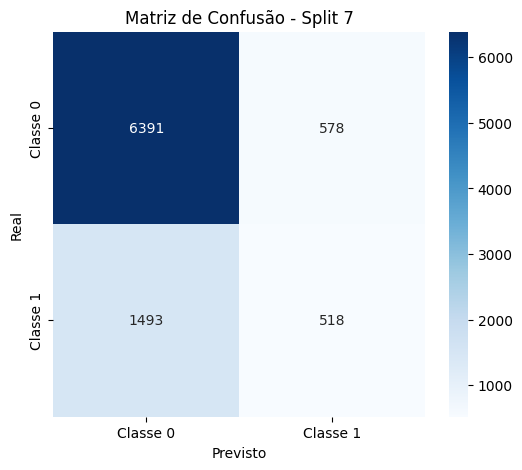

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:21:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia do split 8: 0.7722
              precision    recall  f1-score   support

           0     0.8110    0.9211    0.8625      6969
           1     0.4836    0.2561    0.3349      2011

    accuracy                         0.7722      8980
   macro avg     0.6473    0.5886    0.5987      8980
weighted avg     0.7377    0.7722    0.7444      8980



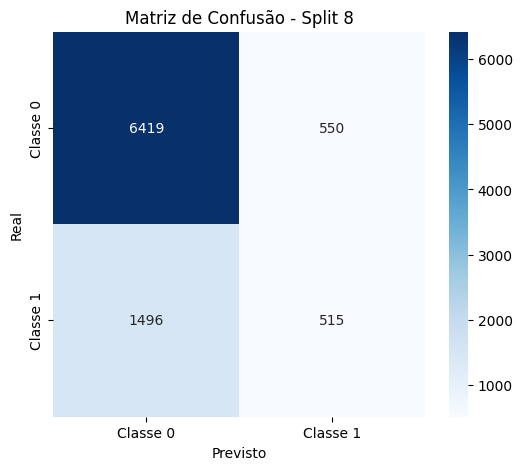

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:24:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia do split 9: 0.7715
              precision    recall  f1-score   support

           0     0.8109    0.9201    0.8621      6969
           1     0.4809    0.2566    0.3346      2011

    accuracy                         0.7715      8980
   macro avg     0.6459    0.5883    0.5983      8980
weighted avg     0.7370    0.7715    0.7439      8980



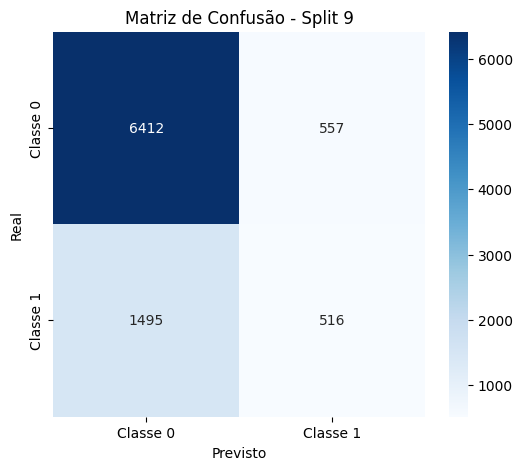

Média de acurácia: 0.7716


In [97]:
media_acuracia = mean(validacao_cruzada(model, base_credito, base_credito_target, oversampling=True))
print(f'Média de acurácia: {media_acuracia:.4f}')

O modelo teve indices aceitavéis de precisão, porém o recall da clase target não ficou bom e ainda há o problema das 30k linhas perdidas.

Para resolver esse problema, vamos substituir os dados nulos pelas medianas de suas respectivas features (anteriormente foi-se dito que isso não seria feito, porém não pensei que teria problema ao fazer o oversampling, infelizmente imprevistos acontecem).

In [98]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline


def validacao_cruzada_2(modelo, X, y, oversampling=False):
    kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    acuracias_split = []

    for idx, (idx_treino, idx_validacao) in enumerate(kf.split(X, y)):
        X_split_treino = X.iloc[idx_treino, :]
        y_split_treino = y.iloc[idx_treino]

        # Imputar valores nulos com mediana
        imputer = SimpleImputer(strategy='median')
        X_split_treino = pd.DataFrame(imputer.fit_transform(X_split_treino), columns=X.columns)

        if oversampling:
            ros = RandomOverSampler(random_state=42)
            renn = EditedNearestNeighbours()
            pipeline = Pipeline([('ros', ros), ('renn', renn)])
            X_split_treino, y_split_treino = pipeline.fit_resample(X_split_treino, y_split_treino)

        modelo.fit(X_split_treino, y_split_treino.values.flatten())

        X_split_validacao = X.iloc[idx_validacao, :]
        y_split_validacao = y.iloc[idx_validacao]

        # Aplicar mesmo imputador nos dados de validação
        X_split_validacao = pd.DataFrame(imputer.transform(X_split_validacao), columns=X.columns)

        y_proba = modelo.predict_proba(X_split_validacao)[:, 1]
        threshold = 0.6
        predicao_split_validacao = (y_proba > threshold).astype(int)

        # Métricas
        acuracia_split = accuracy_score(y_split_validacao, predicao_split_validacao)
        acuracias_split.append(acuracia_split)

        print(f'\nAcurácia do split {idx}: {acuracia_split:.4f}')
        print(classification_report(y_split_validacao, predicao_split_validacao, digits=4))

        cm = confusion_matrix(y_split_validacao, predicao_split_validacao)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Classe 0', 'Classe 1'],
                    yticklabels=['Classe 0', 'Classe 1'])
        plt.xlabel('Previsto')
        plt.ylabel('Real')
        plt.title(f'Matriz de Confusão - Split {idx}')
        plt.show()

    return acuracias_split


In [99]:
base_credito

,IDADE,VAR6,VAR7,VAR10,VAR14,VAR18,VAR24,VAR39,VAR40,VAR41,...,VAR93_ALTISSIMA,VAR93_BAIXISSIMA,VAR95_ALTISSIMA,VAR95_BAIXISSIMA,VAR100_BAIXISSIMA,VAR120_PROXIMO,VAR142_B,VAR142_C,VAR142_D,VAR142_E
0,34.137,-8.808779,-63.878470,2,0.141,1.263014,0.034,0.512334,0.486768,0.357526,...,False,True,False,True,True,True,False,False,True,False
1,40.447,-7.146537,-34.926080,4,0.136,0.654795,0.017,0.328021,0.447454,0.414335,...,False,False,False,False,False,False,False,False,False,True
2,33.515,-27.900178,-53.314035,1,0.152,1.665753,0.000,0.627262,0.730539,0.916771,...,False,True,False,True,True,True,False,False,False,True
3,25.797,-12.948874,-38.451863,4,0.014,0.619178,0.000,0.338643,0.405233,0.408007,...,True,False,False,False,False,False,False,False,False,True
4,54.074,-30.051810,-51.213277,4,0.207,2.090411,0.000,0.626047,0.770664,0.907036,...,True,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120741,56.542,-22.908912,-43.529742,2,0.811,1.358904,0.000,0.659230,0.360866,0.374826,...,True,False,False,False,False,False,False,False,False,True
120744,58.200,-16.374239,-39.584417,4,0.144,0.463014,0.052,0.404892,0.601403,0.573937,...,False,True,False,False,True,False,False,False,False,True
120745,30.474,-12.900183,-38.673056,1,0.777,1.027397,0.034,0.292768,0.509101,0.771178,...,False,True,False,True,True,False,False,False,False,True
120746,19.570,-22.172110,-47.374184,4,0.119,1.416438,0.000,0.626240,0.423891,0.433104,...,False,True,False,False,True,False,False,False,False,True


In [100]:
model_2 = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    min_child_weight=5,
    reg_alpha=0.5,
    reg_lambda=1.0,
    tree_method='hist',
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=1
)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:26:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Acurácia do split 0: 0.7686
              precision    recall  f1-score   support

           0     0.8095    0.9179    0.8603      6970
           1     0.4689    0.2511    0.3271      2011

    accuracy                         0.7686      8981
   macro avg     0.6392    0.5845    0.5937      8981
weighted avg     0.7332    0.7686    0.7409      8981



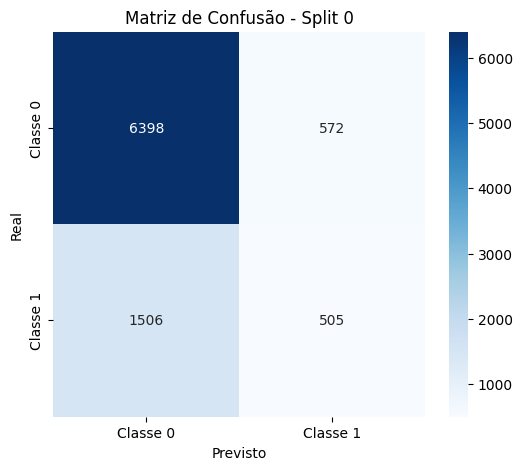

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:28:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Acurácia do split 1: 0.7751
              precision    recall  f1-score   support

           0     0.8136    0.9212    0.8641      6969
           1     0.4963    0.2689    0.3488      2012

    accuracy                         0.7751      8981
   macro avg     0.6550    0.5951    0.6064      8981
weighted avg     0.7425    0.7751    0.7486      8981



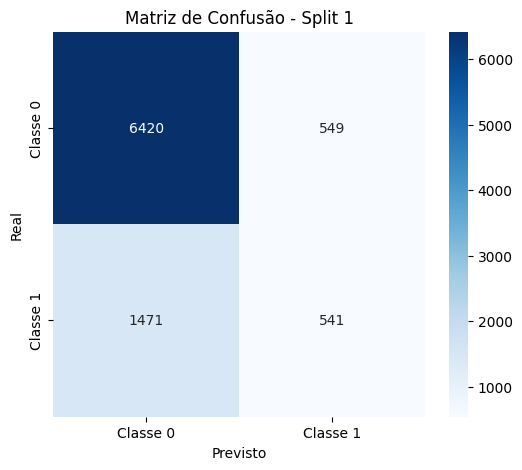

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:31:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Acurácia do split 2: 0.7707
              precision    recall  f1-score   support

           0     0.8114    0.9179    0.8614      6969
           1     0.4781    0.2606    0.3373      2011

    accuracy                         0.7707      8980
   macro avg     0.6447    0.5892    0.5993      8980
weighted avg     0.7368    0.7707    0.7440      8980



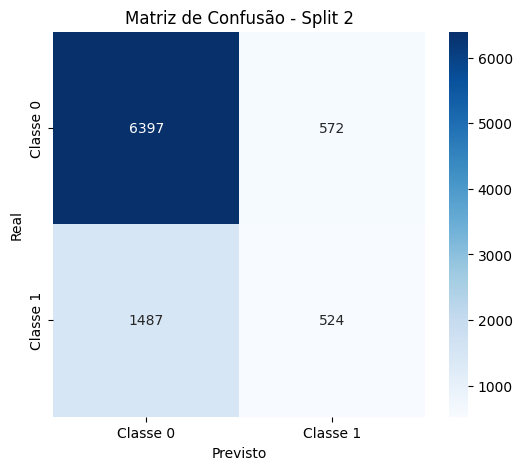

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:33:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Acurácia do split 3: 0.7704
              precision    recall  f1-score   support

           0     0.8094    0.9209    0.8616      6969
           1     0.4757    0.2486    0.3266      2011

    accuracy                         0.7704      8980
   macro avg     0.6426    0.5848    0.5941      8980
weighted avg     0.7347    0.7704    0.7418      8980



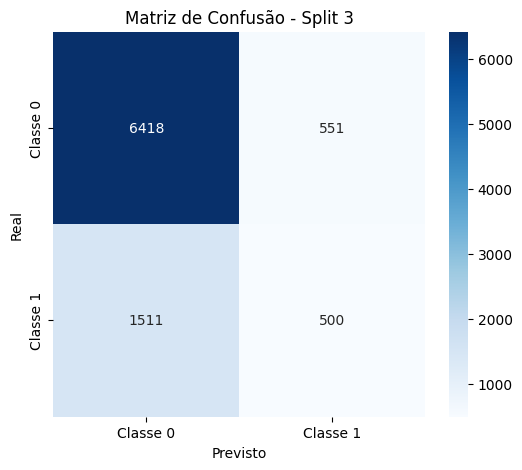

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:36:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Acurácia do split 4: 0.7771
              precision    recall  f1-score   support

           0     0.8139    0.9241    0.8655      6969
           1     0.5042    0.2675    0.3496      2011

    accuracy                         0.7771      8980
   macro avg     0.6590    0.5958    0.6075      8980
weighted avg     0.7445    0.7771    0.7499      8980



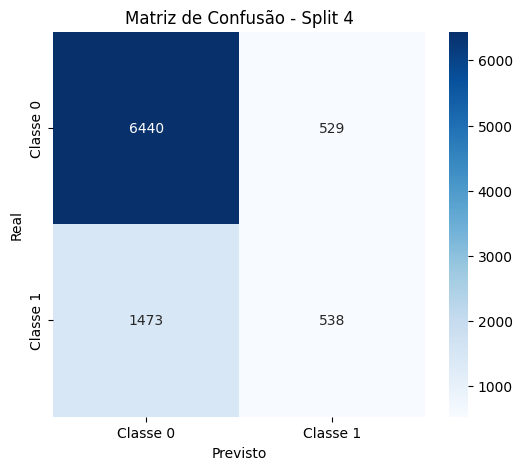

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Acurácia do split 5: 0.7693
              precision    recall  f1-score   support

           0     0.8086    0.9206    0.8610      6969
           1     0.4708    0.2447    0.3220      2011

    accuracy                         0.7693      8980
   macro avg     0.6397    0.5827    0.5915      8980
weighted avg     0.7329    0.7693    0.7403      8980



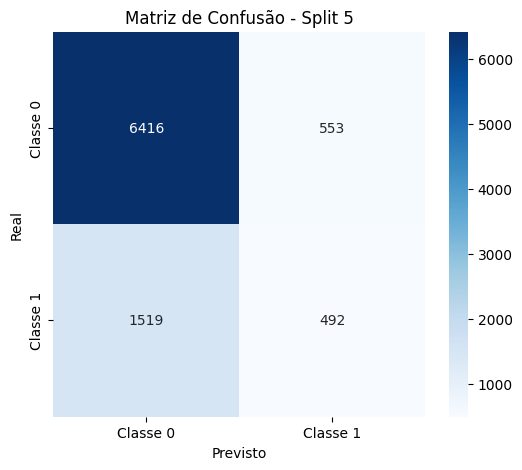

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:41:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Acurácia do split 6: 0.7717
              precision    recall  f1-score   support

           0     0.8120    0.9185    0.8620      6969
           1     0.4822    0.2631    0.3404      2011

    accuracy                         0.7717      8980
   macro avg     0.6471    0.5908    0.6012      8980
weighted avg     0.7381    0.7717    0.7452      8980



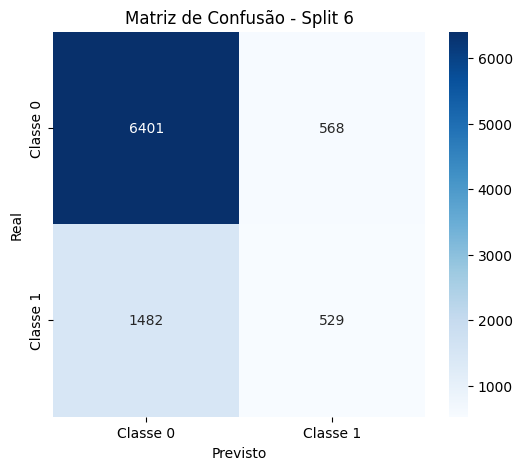

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:43:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Acurácia do split 7: 0.7694
              precision    recall  f1-score   support

           0     0.8106    0.9171    0.8606      6969
           1     0.4726    0.2576    0.3334      2011

    accuracy                         0.7694      8980
   macro avg     0.6416    0.5873    0.5970      8980
weighted avg     0.7349    0.7694    0.7425      8980



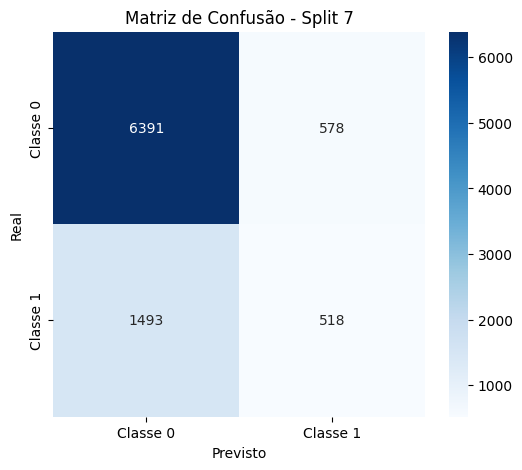

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:46:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Acurácia do split 8: 0.7722
              precision    recall  f1-score   support

           0     0.8110    0.9211    0.8625      6969
           1     0.4836    0.2561    0.3349      2011

    accuracy                         0.7722      8980
   macro avg     0.6473    0.5886    0.5987      8980
weighted avg     0.7377    0.7722    0.7444      8980



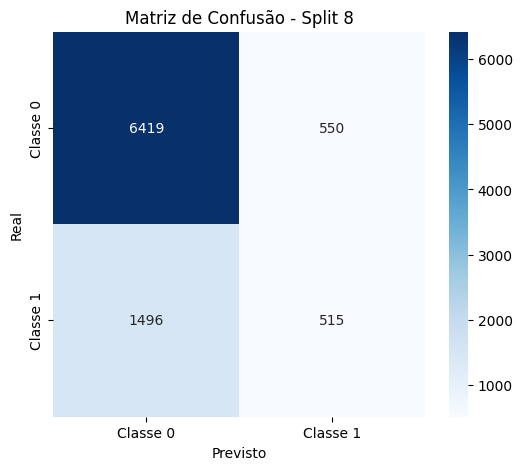

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:48:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Acurácia do split 9: 0.7715
              precision    recall  f1-score   support

           0     0.8109    0.9201    0.8621      6969
           1     0.4809    0.2566    0.3346      2011

    accuracy                         0.7715      8980
   macro avg     0.6459    0.5883    0.5983      8980
weighted avg     0.7370    0.7715    0.7439      8980



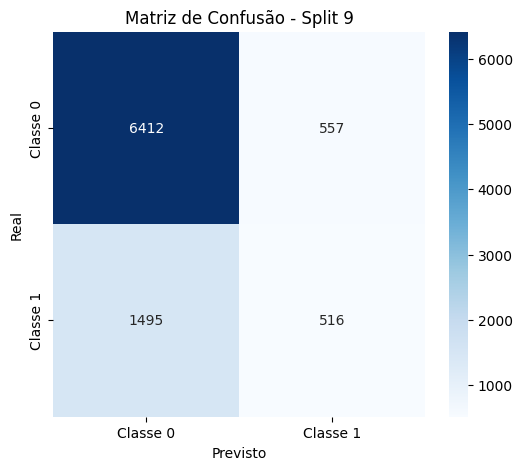

Média de acurácia: 0.7716


In [101]:
media_acuracia = mean(validacao_cruzada_2(model_2, base_credito, base_credito_target, oversampling=True))
print(f'Média de acurácia: {media_acuracia:.4f}')

Perceba que após substituirmos os dados nulos no dataset ocorreu uma leve piora na aprendizagem no modelo, o recall(quantidade de maus pagadores classificados/total de maus pagadores) da classe de maus pagadores que já era ruim, piorou, o que é pessimo para o modelo proposto. Com essa piora conclui-se então que a forma que fizemos o preenchimento dos dados nulos foi ruim

Por isso iremos avaliar o primeiro modelo, tendo em vista que foi o melhor.

#Testagem do Modelo

In [139]:
colunas_base_credito

Index(['TARGET', 'VAR2', 'IDADE', 'VAR5', 'VAR6', 'VAR7', 'VAR9', 'VAR10',
       'VAR14', 'VAR18',
       ...
       'VAR136', 'VAR137', 'VAR138', 'VAR139', 'VAR140', 'VAR141', 'VAR142',
       'VAR147', 'ID', 'IDADE*VAR14'],
      dtype='object', length=113)

In [153]:
base_credito_teste = pd.read_csv("/content/test")

In [154]:
base_credito_teste

,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-01-04 00:00:00+00:00,0,M,61.532,NaN,BA,-12.600989,-38.965939,NaN,E,...,2380.533735,D,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,8396
1,2017-08-22 00:00:00+00:00,0,F,28.586,NaN,PE,-7.854283,-35.763047,E,E,...,1428.485398,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,74636
2,2017-01-04 00:00:00+00:00,1,NaN,NaN,NaN,MG,-17.217517,-46.872278,NaN,E,...,1428.485398,E,NaN,NaN,NaN,NaN,102,NOME INEXISTENTE#@#EMAIL INEXISTENTE,2.6.1,95855
3,2017-01-09 00:00:00+00:00,1,NaN,NaN,NaN,PA,-1.884456,-48.765531,NaN,E,...,1428.485398,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,120857
4,2017-05-11 00:00:00+00:00,0,M,24.288,NaN,SP,-23.612733,-46.762968,E,E,...,1593.518909,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,126978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51746,2017-01-02 00:00:00+00:00,1,NaN,NaN,NaN,AM,-3.106358,-60.054396,NaN,E,...,1344.866459,E,NaN,NaN,NaN,NaN,102,NOME INEXISTENTE#@#EMAIL INEXISTENTE,2.6.1,92929
51747,2017-06-07 00:00:00+00:00,0,F,22.099,NaN,SP,-24.312468,-47.001652,E,E,...,1407.978124,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,6490
51748,2017-08-02 00:00:00+00:00,0,F,59.753,NaN,MG,-21.560366,-45.444131,D,E,...,2459.049077,D,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,41927
51749,2017-06-08 00:00:00+00:00,1,M,20.340,NaN,NaN,NaN,NaN,NaN,NaN,...,1500.239438,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,101573


In [143]:
colunas_base_credito_teste = base_credito_teste.columns
print(colunas_base_credito_teste)

Index(['REF_DATE', 'TARGET', 'VAR2', 'IDADE', 'VAR4', 'VAR5', 'VAR6', 'VAR7',
       'VAR8', 'VAR9',
       ...
       'VAR141', 'VAR142', 'VAR143', 'VAR144', 'VAR145', 'VAR146', 'VAR147',
       'VAR148', 'VAR149', 'ID'],
      dtype='object', length=151)


In [144]:
colunas_drop = colunas_base_credito_teste.difference(colunas_base_credito)
print(colunas_drop)

Index(['REF_DATE', 'VAR11', 'VAR12', 'VAR13', 'VAR143', 'VAR144', 'VAR145',
       'VAR146', 'VAR148', 'VAR149', 'VAR15', 'VAR16', 'VAR17', 'VAR19',
       'VAR20', 'VAR21', 'VAR22', 'VAR23', 'VAR25', 'VAR26', 'VAR27', 'VAR28',
       'VAR29', 'VAR30', 'VAR31', 'VAR32', 'VAR33', 'VAR34', 'VAR35', 'VAR36',
       'VAR37', 'VAR38', 'VAR4', 'VAR43', 'VAR44', 'VAR45', 'VAR46', 'VAR48',
       'VAR8'],
      dtype='object')


In [155]:
for col in colunas_drop:
  base_credito_teste = base_credito_teste.drop(col, axis = 1)

In [156]:
base_credito_teste

,TARGET,VAR2,IDADE,VAR5,VAR6,VAR7,VAR9,VAR10,VAR14,VAR18,...,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR147,ID
0,0,M,61.532,BA,-12.600989,-38.965939,E,ALTISSIMA,0.088,1.180822,...,MUITO PROXIMO,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,2380.533735,D,102,8396
1,0,F,28.586,PE,-7.854283,-35.763047,E,ALTISSIMA,0.137,1.046575,...,MUITO LONGE,LONGE,LONGE,MUITO LONGE,LONGE,MUITO PROXIMO,1428.485398,E,102,74636
2,1,NaN,NaN,MG,-17.217517,-46.872278,E,ALTISSIMA,NaN,NaN,...,MUITO PROXIMO,MUITO LONGE,LONGE,LONGE,LONGE,MUITO PROXIMO,1428.485398,E,102,95855
3,1,NaN,NaN,PA,-1.884456,-48.765531,E,ALTISSIMA,NaN,NaN,...,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO PROXIMO,1428.485398,E,102,120857
4,0,M,24.288,SP,-23.612733,-46.762968,E,MEDIA,0.144,0.767123,...,LONGE,MEDIO,PROXIMO,MEDIO,PROXIMO,PROXIMO,1593.518909,E,102,126978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51746,1,NaN,NaN,AM,-3.106358,-60.054396,E,ALTA,0.087,0.852055,...,PROXIMO,MUITO LONGE,MEDIO,PROXIMO,MEDIO,LONGE,1344.866459,E,102,92929
51747,0,F,22.099,SP,-24.312468,-47.001652,E,ALTISSIMA,0.101,1.279452,...,MUITO LONGE,MEDIO,MUITO LONGE,LONGE,LONGE,MUITO PROXIMO,1407.978124,E,102,6490
51748,0,F,59.753,MG,-21.560366,-45.444131,E,BAIXA,0.763,0.610959,...,PROXIMO,LONGE,PROXIMO,PROXIMO,PROXIMO,LONGE,2459.049077,D,102,41927
51749,1,M,20.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1500.239438,E,102,101573


In [157]:
base_credito_teste['IDADE*VAR14'] = base_credito_teste['IDADE'] * base_credito_teste['VAR14']

for col in categoricas:
    if base_credito_teste[col].astype(str).str.upper().str.contains('MEDIA|MEDIO').any():
        ordinais.append(col)

le_teste = LabelEncoder()
for col in ordinais:
  base_credito_teste[col] = le_teste.fit_transform(base_credito_teste[col])

for col in categoricas:
  base_credito_teste = pd.get_dummies(base_credito_teste, columns=[col], drop_first=True)

In [158]:
base_credito_teste

,TARGET,IDADE,VAR6,VAR7,VAR14,VAR18,VAR24,VAR39,VAR40,VAR41,...,VAR139_5,VAR140_1,VAR140_2,VAR140_3,VAR140_4,VAR140_5,VAR142_B,VAR142_C,VAR142_D,VAR142_E
0,0,61.532,-12.600989,-38.965939,0.088,1.180822,0.000,0.708001,0.495868,0.839372,...,False,False,True,False,False,False,False,False,True,False
1,0,28.586,-7.854283,-35.763047,0.137,1.046575,0.138,0.342282,0.512095,0.929060,...,False,False,False,True,False,False,False,False,False,True
2,1,NaN,-17.217517,-46.872278,NaN,NaN,NaN,0.215749,0.613727,0.772303,...,False,False,False,True,False,False,False,False,False,True
3,1,NaN,-1.884456,-48.765531,NaN,NaN,NaN,0.211022,0.534250,0.965870,...,False,False,False,True,False,False,False,False,False,True
4,0,24.288,-23.612733,-46.762968,0.144,0.767123,0.086,0.200765,0.489197,0.607445,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51746,1,NaN,-3.106358,-60.054396,0.087,0.852055,0.069,0.496033,0.466042,0.374620,...,False,False,False,False,False,False,False,False,False,True
51747,0,22.099,-24.312468,-47.001652,0.101,1.279452,0.000,0.466101,0.451845,0.828596,...,False,False,False,True,False,False,False,False,False,True
51748,0,59.753,-21.560366,-45.444131,0.763,0.610959,0.138,0.433821,0.605530,0.596395,...,False,False,False,False,False,False,False,False,True,False
51749,1,20.340,NaN,NaN,NaN,NaN,NaN,0.503074,NaN,NaN,...,True,False,False,False,False,True,False,False,False,True


In [159]:
testar_target = base_credito_teste['TARGET']
base_credito_teste = base_credito_teste.drop('TARGET', axis = 1)

In [161]:
base_credito_teste = base_credito_teste.reindex(columns=base_credito.columns, fill_value=0) # Função para igualar as features da base de teste com a de treino

In [162]:
base_credito_teste

,IDADE,VAR6,VAR7,VAR10,VAR14,VAR18,VAR24,VAR39,VAR40,VAR41,...,VAR93_ALTISSIMA,VAR93_BAIXISSIMA,VAR95_ALTISSIMA,VAR95_BAIXISSIMA,VAR100_BAIXISSIMA,VAR120_PROXIMO,VAR142_B,VAR142_C,VAR142_D,VAR142_E
0,61.532,-12.600989,-38.965939,0,0.088,1.180822,0.000,0.708001,0.495868,0.839372,...,False,True,False,True,True,False,False,False,True,False
1,28.586,-7.854283,-35.763047,0,0.137,1.046575,0.138,0.342282,0.512095,0.929060,...,False,True,False,True,True,False,False,False,False,True
2,NaN,-17.217517,-46.872278,0,NaN,NaN,NaN,0.215749,0.613727,0.772303,...,False,True,False,True,True,False,False,False,False,True
3,NaN,-1.884456,-48.765531,0,NaN,NaN,NaN,0.211022,0.534250,0.965870,...,False,True,False,True,True,True,False,False,False,True
4,24.288,-23.612733,-46.762968,0,0.144,0.767123,0.086,0.200765,0.489197,0.607445,...,True,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51746,NaN,-3.106358,-60.054396,0,0.087,0.852055,0.069,0.496033,0.466042,0.374620,...,True,False,True,False,True,False,False,False,False,True
51747,22.099,-24.312468,-47.001652,0,0.101,1.279452,0.000,0.466101,0.451845,0.828596,...,False,True,False,True,True,False,False,False,False,True
51748,59.753,-21.560366,-45.444131,0,0.763,0.610959,0.138,0.433821,0.605530,0.596395,...,False,True,False,False,True,False,False,False,True,False
51749,20.340,NaN,NaN,0,NaN,NaN,NaN,0.503074,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True


Acurácia:  0.7525
Precisão:  0.4837
Recall:    0.1478
F1-Score:  0.2264

Detalhamento por classe:

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     39071
           1       0.48      0.15      0.23     12680

    accuracy                           0.75     51751
   macro avg       0.63      0.55      0.54     51751
weighted avg       0.70      0.75      0.70     51751



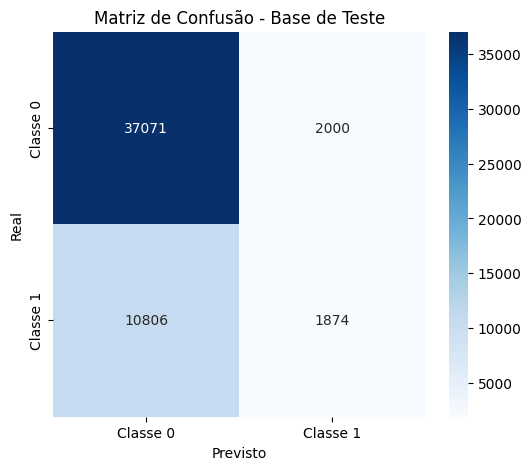

In [165]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#
y_proba = model.predict_proba(base_credito_teste)[:, 1]
y_pred = (y_proba >= 0.6).astype(int)

accuracy = accuracy_score(testar_target, y_pred)
precision = precision_score(testar_target, y_pred)
recall = recall_score(testar_target, y_pred)
f1 = f1_score(testar_target, y_pred)

print(f"Acurácia:  {accuracy:.4f}")
print(f"Precisão:  {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\nDetalhamento por classe:\n")
print(classification_report(testar_target, y_pred))

cm = confusion_matrix(testar_target, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()


Feedback do modelo :

- Não soube identificar muito bem a classe target, mesmo após o oversampling ficou viciados em classificar 0

- De todos da classe target acertou apenas 15% e quando classificara como 1 errara em 50% das vezes

- Não adaptou-se muito bem ao dataset de teste, tendo em vista em vista que o recall caiu em 10% em relação aos treinos. Isso deve provavelmente ao surgimento de novas variaveis no dataset teste

O modelo acima proposto teve um desempenho muito ruim, como podemos ver com base no recall, há uma série de problemas e ferramentas que poderíamos adicionar para que ele tivesse um melhor desempenho que são:

- Tratar os dados nulos de forma separada, inicialmente a ideia era não tratar os dados nulos, porém não visualizei que a função do oversampling tivesse problema com isso, então tive que trata-los de modo geral para todos os tipos de variáveis o que não foi benéfico para o modelo.

- Implementar tecnicas de fine tunning, tanto no modelo quanto no threshold de 0.6 escolhida para a classificação.

- Aplicar um PCA e observar o comportamento do modelo.

- Melhora nas técnicas de Feature Engineering.

Esse projeto foi feito em aproximadamente em 48 horas e por isso ficou com algumas lacunas, posteriormente serão implementadas essas melhorias.